In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from joblib import dump

In [21]:
csv_in = '../ai-08/cancer.csv'

In [22]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=14, header=0)
print(df.shape)
print(df.info())
display(df.head())

(569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       569 non-null    int64  
 1   Diag     569 non-null    object 
 2   ave_a    569 non-null    float64
 3   ave_b    569 non-null    float64
 4   ave_c    569 non-null    float64
 5   ave_d    569 non-null    float64
 6   ave_e    569 non-null    float64
 7   ave_f    569 non-null    float64
 8   ave_g    569 non-null    float64
 9   ave_h    569 non-null    float64
 10  ave_i    569 non-null    float64
 11  ave_j    569 non-null    float64
 12  se_a     569 non-null    float64
 13  se_b     569 non-null    float64
 14  se_c     569 non-null    float64
 15  se_d     569 non-null    float64
 16  se_e     569 non-null    float64
 17  se_f     569 non-null    float64
 18  se_g     569 non-null    float64
 19  se_h     569 non-null    float64
 20  se_i     569 non-null    float64
 21  se_j  

,ID,Diag,ave_a,ave_b,ave_c,ave_d,ave_e,ave_f,ave_g,ave_h,...,worst_a,worst_b,worst_c,worst_d,worst_e,worst_f,worst_g,worst_h,worst_i,worst_j
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
df_X= df.loc[:, 'ave_a':]
ser_y = df['Diag']

In [24]:
print(df_X.shape)
print(df_X.info())
display(df_X.head())
print(ser_y.shape)
print(ser_y.head())

(569, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ave_a    569 non-null    float64
 1   ave_b    569 non-null    float64
 2   ave_c    569 non-null    float64
 3   ave_d    569 non-null    float64
 4   ave_e    569 non-null    float64
 5   ave_f    569 non-null    float64
 6   ave_g    569 non-null    float64
 7   ave_h    569 non-null    float64
 8   ave_i    569 non-null    float64
 9   ave_j    569 non-null    float64
 10  se_a     569 non-null    float64
 11  se_b     569 non-null    float64
 12  se_c     569 non-null    float64
 13  se_d     569 non-null    float64
 14  se_e     569 non-null    float64
 15  se_f     569 non-null    float64
 16  se_g     569 non-null    float64
 17  se_h     569 non-null    float64
 18  se_i     569 non-null    float64
 19  se_j     569 non-null    float64
 20  worst_a  569 non-null    float64
 21  worst_

,ave_a,ave_b,ave_c,ave_d,ave_e,ave_f,ave_g,ave_h,ave_i,ave_j,...,worst_a,worst_b,worst_c,worst_d,worst_e,worst_f,worst_g,worst_h,worst_i,worst_j
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569,)
0    M
1    M
2    M
3    M
4    M
Name: Diag, dtype: object


In [25]:
rfc=RandomForestClassifier(random_state=13)            

# Hyper paramet settings for grid search
param_grid = {
    'n_estimators': [50, 100, 500, 1000],
    'max_depth' : [2, 4, 6, None],
}

In [26]:
grid_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=17)
gen_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=19)

In [27]:
gs = GridSearchCV(rfc, param_grid , cv=grid_cv, scoring='accuracy')

In [28]:
%%time
nested_score = cross_val_score(gs, X=df_X, y=ser_y, cv=gen_cv,
                               scoring='accuracy')
print(nested_score)
print(nested_score.mean())

[0.96503497 0.92957746 0.95774648 0.97183099]
0.9560474736531075
Wall time: 2min 4s


In [29]:
%%time
gs.fit(df_X, ser_y)
gs_best = gs.best_estimator_

Wall time: 34.3 s


In [30]:
print(gs_best)

RandomForestClassifier(n_estimators=500, random_state=13)


In [31]:
print(pd.Series(gs_best.feature_importances_, index=df_X.columns))

ave_a      0.037807
ave_b      0.013900
ave_c      0.044392
ave_d      0.051319
ave_e      0.006326
ave_f      0.010568
ave_g      0.056455
ave_h      0.108826
ave_i      0.003912
ave_j      0.003625
se_a       0.011245
se_b       0.004413
se_c       0.013087
se_d       0.036506
se_e       0.003872
se_f       0.004571
se_g       0.006961
se_h       0.004241
se_i       0.004594
se_j       0.005199
worst_a    0.109471
worst_b    0.017264
worst_c    0.140128
worst_d    0.097140
worst_e    0.013382
worst_f    0.013550
worst_g    0.034966
worst_h    0.124988
worst_i    0.009765
worst_j    0.007528
dtype: float64


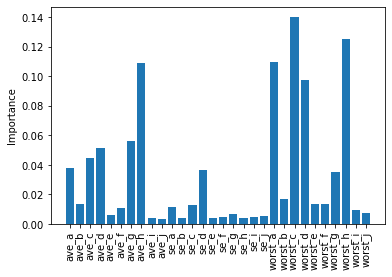

In [33]:
plt.bar(df_X.columns, gs_best.feature_importances_)
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [32]:
tag = 'cancer'
model_file = 'rfc_best_{}.joblib'.format(tag)
dump(gs_best, model_file)

['rfc_best_cancer.joblib']